# SAP Cloud ALM Project and Task API Test and Demo

This notebook contains examples of SAP Business Hub API calls for SAP Cloud ALM for Implementation. The specific APIs shown below are for Projects and Tasks.

The API information and specification is available here:

* https://api.sap.com/package/SAPCloudALM/rest - SAP Cloud ALM
* https://api.sap.com/api/CALM_PJM/overview - SAP Cloud ALM Projects
* https://api.sap.com/api/CALM_TKM/overview - SAP Cloud ALM Tasks

Please note the license and other terms and conditions contained in this notebook's repository: https://github.com/SAP-samples/cloud-alm-api-examples

## Python Dependencies Required

In order to run the samples in this notebook, install the following dependencies:

* Jupyter integration in Visual Studio Code: https://code.visualstudio.com/docs/python/jupyter-support 
* Python 3, a recent version, is Required. Python 3.8 was used here.
* Requests - for handling HTTP GET/POST/PATCH/DELETE Requests - https://docs.python-requests.org/en/latest/user/install/#install
* Requests-OAuthlib - for authentication with requests - https://requests-oauthlib.readthedocs.io/en/latest/index.html#installation
* Pandas - Python data analysis - https://pandas.pydata.org/docs/getting_started/install.html
* Plotly - for plotting interactive charts - https://plotly.com/python/getting-started/

## APIs called

API to get projects: https://<tenant url\>/api/imp-pjm-srv/v1/projects

API to get tasks: https://<tenant url\>/api/imp-tkm-srv/v1/tasks?projectId=<project ID\>

### Update 2021-07-28 - New Attributes Added

The following attributes are now available in all tasks API:

* priorityId - Priority key, see API specification for possible values (create, read, update)
* assigneeId - User ID assigned to task, usually the e-mail address (create, read, update)
* assigneeName - Text name of the user (read)

In addition, the following timebox attributes are available in the tasks/<taskID> APIs:

* timeboxName - Text name of the phase, sprint, or milestone assigned to a task (read)
* timeboxStartDate - Date, begin of timebox (read)
* timeboxEndDate - Date, end of timebox (read)



---

## Authentication information

You must create a python module file called `apidata.py` and put the information specific to your tenant there. This inclduds

* OAuth2 client ID and secret
* Token url
* Base URL for API calls

Get client ID and secret variables from an external module: this information is senstive.

These items can be retrieved from the BTP Cockpit 

### Format of module apidata.py for import

```python
ptm_all_client_id = r'get your client ID from BTP Cockpit'
ptm_all_client_secret = r'get your client secret from BTP Cockpit'
token_url = 'your token url'
base_url = 'your base url'
```


In [30]:
import apidata as ad

client_id = ad.ptm_all_client_id
client_secret = ad.ptm_all_client_secret
token_url = ad.token_url
base_url = ad.base_url

### Get token for authentication

Call OAuth token API with credential information. Add the resulting header to all requests.

See Requests-OAuthlib documentation for Backend Application Flow:

* https://requests-oauthlib.readthedocs.io/en/latest/oauth2_workflow.html#backend-application-flow

In [31]:
import requests
from requests_oauthlib import OAuth2Session
from oauthlib.oauth2 import BackendApplicationClient

client = BackendApplicationClient(client_id=client_id)
oauth = OAuth2Session(client=client)
token = oauth.fetch_token(token_url=token_url, client_id=client_id,
        client_secret=client_secret)

hed = {'Authorization': 'Bearer ' + token['access_token']}        


---

## Perform GET request to retrieve list of all projects

Expected response: "200 OK"

In [32]:

response = requests.get(base_url + '/api/calm-projects/v1/projects', headers=hed)

print(response.status_code, response.reason)

200 OK


## Parse JSON into Pandas Dataframe

This takes the data returned from the projects API, which is in JSON format, and places it into a dataframe for further processing and analysis.

In [33]:
import pandas as pd

df = pd.json_normalize(response.json())

df

,id,name,status
0,5e013b69-d603-4f59-afee-ea2024392a28,Juni test project 3,O
1,8687a39a-ab90-4dbc-b3e3-f6ab8a1b89c6,chenxiao_test_1,O
2,2495d431-04c8-4550-bd63-d8d3bc9cacbc,fixIssue,C
3,4f5798c4-75f1-4a88-acd0-8ece2acc4b65,Jekkrey_Test1,O
4,8719b16c-9911-4682-a1d3-1699599fa081,test4,C
...,...,...,...
240,7794f4db-155c-4530-b6c0-f8c254ce3089,Notebook API proj 2021-07-29T15:55:02.816638,O
241,4d5e7951-8fa0-453d-9cab-1f0b106155bf,Notebook API proj 2021-07-29T16:10:53.178030,O
242,f131d2eb-e3dc-4603-be7f-837bae2c3796,Notebook API proj 2021-07-29T16:12:44.356170,O
243,72ca9f92-8de9-40df-b83b-262fff90a981,Notebook API proj 2021-07-29T16:13:23.356937,O


### Example Pie Chart from dataframe

This uses the built-in matplotlib functions from pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

matplotlib should have been installed as a dependency of pandas. If not, you may need to install it separately.

<AxesSubplot:title={'center':'Open and Hidden Projects'}, ylabel='status'>

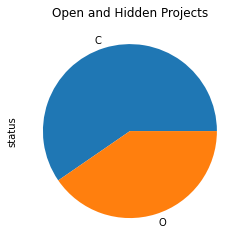

In [34]:
df.status.value_counts().plot.pie(title="Open and Hidden Projects")

## Get a Project Name 

You may wish to adjust the code below to set a project name of your choosing, for example 'My API Test Project'. In this sample, we'll just take the first project in the list.


In [35]:
sample_project_name = df.iloc[0]['name'] # First project in the list
sample_project_name

'Juni test project 3'

### Override Sample Project Name for Demo

Uncomment the following line, and set the project name to a project of your choice, if you wish to work on a specific project.

In [36]:
# sample_project_name = 'Demo Project'

## Get ID of a Selected Project

Read ID of project 'Show & Tell 2021-Apr-30' from dataframe

In [37]:
stPrjID = df.loc[df['name'] == sample_project_name]
show_tell_prj = stPrjID['id'].values[0]
print('Project:', stPrjID['name'].values[0], 'ID:', show_tell_prj)

Project: Gordon Demo Project ID: 17a825f9-b4b5-4685-8396-59d5c80dc15c



---

## Read Task list from selected project

Use GET request from tasks API with selected project ID as input parameter.

Expected response "200 OK"

In [38]:
taskURL = base_url + '/api/calm-tasks/v1/tasks?projectId=' + show_tell_prj

response = requests.get(taskURL, headers=hed)

print(response.status_code, response.reason)

200 OK


### Parse project task list JSON into dataframe

In [39]:
df_stTasks = pd.json_normalize(response.json())

df_stTasks.head()

,id,projectId,title,type,status,externalId,dueDate,priorityId,assigneeId,assigneeName
0,6726e8aa-555a-4be4-9f96-89c69aaacd54,17a825f9-b4b5-4685-8396-59d5c80dc15c,Edit Action Data and Change Visibility of Test...,CALMTMPL,CIPTKOPEN,None,2021-08-07,30,None,None
1,4bea2b61-307e-47c3-9ced-01b2cc30b912,17a825f9-b4b5-4685-8396-59d5c80dc15c,Customize Form Templates,CALMTMPL,CIPTKINP,None,2021-07-23,30,None,None
2,e8292279-ebb6-4e97-8714-ccbe8357307c,17a825f9-b4b5-4685-8396-59d5c80dc15c,Request the Production System,CALMTMPL,CIPTKOPEN,None,2021-08-07,30,None,None
3,b2b77c06-36f4-4c3f-8e8c-5896a0f88ddb,17a825f9-b4b5-4685-8396-59d5c80dc15c,Execute Regression Testing,CALMTMPL,CIPTKOPEN,None,2021-08-07,30,None,None
4,ce587643-8d6a-43d7-bd30-b908c55e33c0,17a825f9-b4b5-4685-8396-59d5c80dc15c,Execute Data Migration,CALMTMPL,CIPTKOPEN,None,2021-08-07,30,None,None


### Barchart plot of tasks by status

Use built-in matplotlib of Pandas for quick data exploration

<AxesSubplot:title={'center':'Task Status'}>

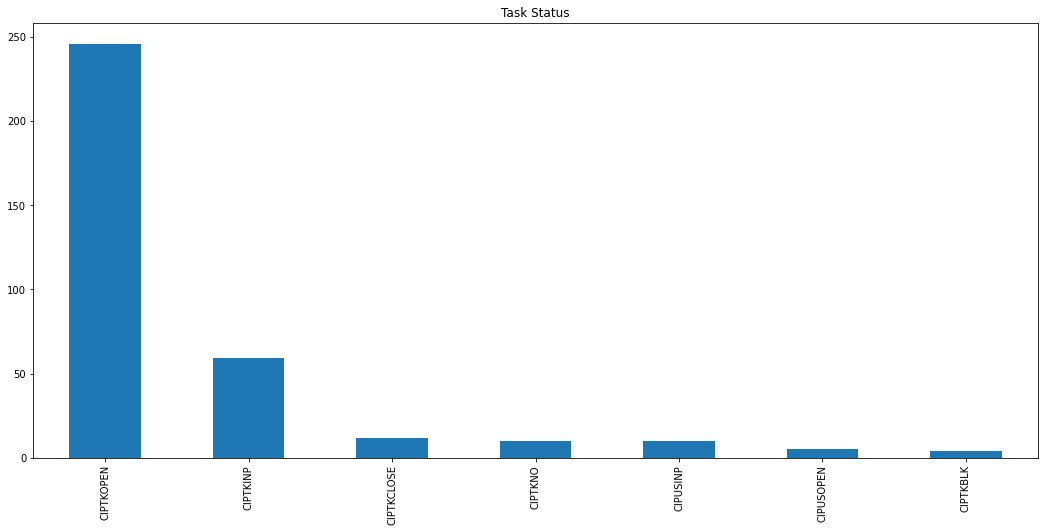

In [40]:
df_stTasks.status.value_counts().plot.bar(title="Task Status", figsize=(18,8))

## Update 2021-07-28 - Task Priority Attribute

This graph shows tasks grouped by priority.

See the API specification for the priority schema. The current values are as follows:

10 - Very High
20 - High
30 - Medium
40 - Low


<AxesSubplot:title={'center':'Task Priorities'}>

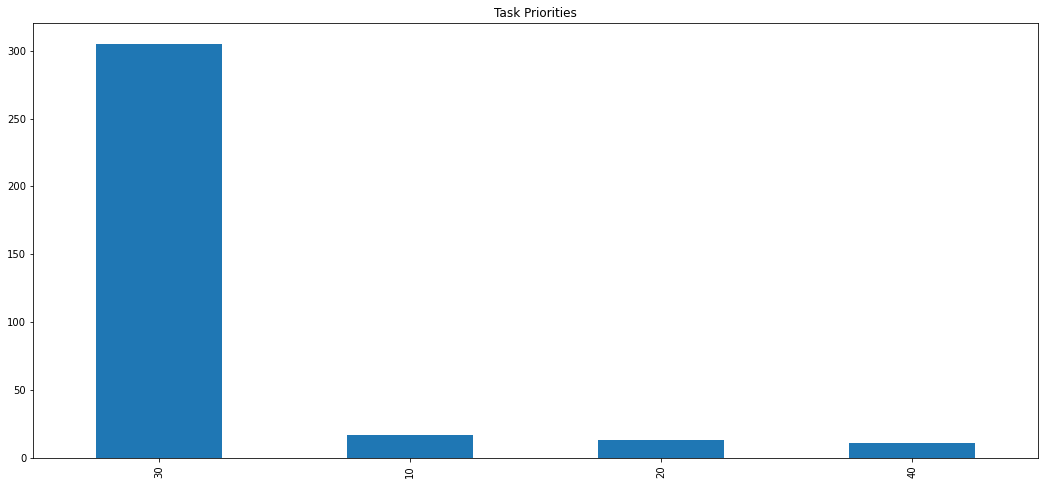

In [41]:
df_stTasks.priorityId.value_counts().plot.bar(title="Task Priorities", figsize=(18,8))

### Analyze tasks by status and due date

Count tasks in each due date/status bin


In [42]:
df_stTasks_Status = df_stTasks.groupby(by=['status','dueDate'])['id'].count().reset_index()
df_stTasks_Status.rename(columns={'id': 'count'}, inplace=True)
df_stTasks_Status

,status,dueDate,count
0,CIPTKBLK,2021-07-25,4
1,CIPTKCLOSE,2021-07-25,7
2,CIPTKCLOSE,2021-08-20,2
3,CIPTKCLOSE,2021-09-03,3
4,CIPTKINP,2021-07-23,18
5,CIPTKINP,2021-07-25,36
6,CIPTKINP,2021-07-31,1
7,CIPTKINP,2021-08-06,1
8,CIPTKINP,2021-08-07,1
9,CIPTKINP,2021-08-20,1


In [43]:
df_stTasks.groupby(by=['status'])['id'].count().reset_index()

,status,id
0,CIPTKBLK,4
1,CIPTKCLOSE,12
2,CIPTKINP,59
3,CIPTKNO,10
4,CIPTKOPEN,246
5,CIPUSINP,10
6,CIPUSOPEN,5


### Demo stacked barchart due date, status count

Use Plotly to make a quick stacked barchart. X-axis is due date, y axis is task count, colours in legend are task status values.

Further information on the Plotly graphing library for Python: https://plotly.com/python/

In [44]:
import plotly.express as px

fig = px.bar(df_stTasks_Status, x='dueDate', y='count', color='status', title="Task Status by Due Date", width=1200, height=800)
fig


---

## Create Task

* Endpoint: `https://<tenant url>/api/imp-tkm-srv/v1/tasks`

* Type: Post

Append a timestamp to the end of the new task title for easy identification in UI.

* Change `user@example.com` to a user in your tenant for this to function, or remove the `assigneeId` attribute.

Expected response `201 Created`


In [45]:
import datetime

isoNow = datetime.datetime.now().isoformat()

taskCreateURL = base_url + '/api/calm-tasks/v1/tasks'

taskData = {
    "projectId": show_tell_prj,
    "title": "Notebook API test task " + isoNow,
    "type": "CALMTASK",
    "description": "test description. hello world",
    "assigneeId": "user@example.com"
}

response = requests.post(taskURL, headers=hed, json=taskData)

print(response.status_code, response.reason)

newTaskID = response.json()['id']
print("New task ID:", newTaskID)

201 Created
New task ID: f03a72ea-f53b-4267-aac7-3938203cfe5f



---

## Get Task Details

Use GET request to read details of task just created

* Endpoint: `https://<tenant url>/rest/tkm/v1/tasks/{taskGuid}`

* Type: Get

Expected response: `200 OK`


In [46]:
taskURL = base_url + '/api/calm-tasks/v1/tasks/' + newTaskID

response = requests.get(taskURL, headers=hed)

print(response.status_code, response.reason)

200 OK


### Save and print response JSON

In [47]:
taskToModify = response.json()
taskToModify

{'id': 'f03a72ea-f53b-4267-aac7-3938203cfe5f',
 'projectId': '17a825f9-b4b5-4685-8396-59d5c80dc15c',
 'title': 'Notebook API test task 2021-07-29T16:16:57.814860',
 'type': 'CALMTASK',
 'status': 'CIPTKOPEN',
 'externalId': None,
 'dueDate': '2021-07-25',
 'priorityId': 30,
 'assigneeId': 'tom.petty@sap-test.de',
 'assigneeName': 'tom.petty@sap-test.de',
 'timeboxName': 'Prepare',
 'timeboxStartDate': '2021-07-19',
 'timeboxEndDate': '2021-07-25',
 'description': 'test description. hello world'}


---

## Modify Task

Use PATCH method to update task attributes

Expected response: `200 OK`

In [48]:
taskToModify['title'] = taskToModify['title'] + ' mod'
taskToModify['dueDate'] = '2022-04-09'
taskToModify['status'] = 'CIPTKINP'
taskToModify['description'] = 'This is a new <b>Descripion</b>. It replaces the old description'

### Update 2021-07-28  Set Assignee

Simply set the `assigneeId` attribute to assign the task to a user.

Change 'user@example.com' to a user in your tenant for this to function.


In [49]:
taskToModify['assigneeId'] = 'user@example.com'

In [50]:
taskURL = base_url + '/api/calm-tasks/v1/tasks/' + newTaskID

response = requests.patch(taskURL, headers=hed, json=taskToModify)

print(response.status_code, response.reason)

200 OK


In [51]:
response.json()

{'id': 'f03a72ea-f53b-4267-aac7-3938203cfe5f',
 'projectId': '17a825f9-b4b5-4685-8396-59d5c80dc15c',
 'title': 'Notebook API test task 2021-07-29T16:16:57.814860 mod',
 'type': 'CALMTASK',
 'status': 'CIPTKINP',
 'externalId': 'null',
 'dueDate': '2022-04-09',
 'priorityId': 30,
 'assigneeId': 'user@example.com',
 'assigneeName': 'user@example.com',
 'timeboxName': 'Prepare',
 'timeboxStartDate': '2021-07-19',
 'timeboxEndDate': '2021-07-25',
 'description': 'This is a new <b>Descripion</b>. It replaces the old description'}


---

## Delete Task

DELETE method

Expected response: `204 No Content`


In [52]:
taskURL = base_url + '/api/calm-tasks/v1/tasks/' + newTaskID

response = requests.delete(taskURL, headers=hed)

print(response.status_code, response.reason)

204 No Content



---

## Update 2021-07-28 Gantt Chart Example

See https://plotly.com/python/gantt/ on using Plotly to create Gantt charts.

The following code uses new attributes introduced on 2021-07-27:

* assigneeID, assigneeName - the ID and text name of the person assigned to the task
* timeboxStartDate, timeboxEndDate, timeboxName - the start and end dates of the timebox (e.g. the phase) assigned to the task, and the text name of the timebox

### Filter Task List Based on Assignee

Get an extract of the task list for specific assignees.

In [53]:
df_assigned_tasks = df_stTasks.loc[df_stTasks['assigneeName'].str.contains("@example.com", na=False)].copy(deep=True)
df_assigned_tasks

,id,projectId,title,type,status,externalId,dueDate,priorityId,assigneeId,assigneeName
100,f986af95-33d9-4c73-8c2f-b71d4109b3e4,17a825f9-b4b5-4685-8396-59d5c80dc15c,Ensure Project Team Members Access to the SAP ...,CALMTMPL,CIPTKCLOSE,None,2021-09-03,30,user@example.com,user@example.com
103,34d651da-6827-40b2-89a2-7472c4e3c9ab,17a825f9-b4b5-4685-8396-59d5c80dc15c,Create Scopes and Define Business Processes Scope,CALMTMPL,CIPTKCLOSE,None,2021-09-03,30,user@example.com,user@example.com
104,d264410a-91ee-4d71-a940-bf70f2be8413,17a825f9-b4b5-4685-8396-59d5c80dc15c,Review Overview Documentation,CALMTMPL,CIPTKCLOSE,None,2021-08-20,30,user@example.com,user@example.com
106,9e997bbb-f999-4159-8fd9-e60d242482f9,17a825f9-b4b5-4685-8396-59d5c80dc15c,Setup Central Business Configuration Integrati...,CALMTMPL,CIPTKINP,None,2021-08-20,10,tom.petty.tue29sep2020080002gmt446@example.com,tom.petty.tue29sep2020080002gmt446@example.com
108,9c75f79e-dc51-4ea4-a027-d29bfa599f6f,17a825f9-b4b5-4685-8396-59d5c80dc15c,Assign Team Members,CALMTMPL,CIPTKOPEN,None,2021-10-01,10,tom.petty.tue29sep2020090935gmt36@example.com,tom.petty.tue29sep2020090935gmt36@example.com
109,4e46043b-9b00-4551-a7af-61e7de72cbef,17a825f9-b4b5-4685-8396-59d5c80dc15c,Setup Central Business Configuration Integrati...,CALMTMPL,CIPTKINP,None,2021-10-01,10,tom.petty.tue29sep2020074254gmt127@example.com,tom.petty.tue29sep2020074254gmt127@example.com
111,df1de9c0-2589-4c73-adb9-91701e717136,17a825f9-b4b5-4685-8396-59d5c80dc15c,Collect Details for Extensions,CALMTMPL,CIPTKOPEN,None,2021-09-17,30,user@example.com,user@example.com
122,8edbf876-2545-468c-983d-0cf9a0f4dca7,17a825f9-b4b5-4685-8396-59d5c80dc15c,Create Scopes and Define Business Processes Scope,CALMTMPL,CIPTKOPEN,None,2021-08-14,40,tom.petty.wed19aug2020051117gmt986@example.com,tom.petty.wed19aug2020051117gmt986@example.com
149,7c5b595d-85c4-4a81-a701-ba08bf603c71,17a825f9-b4b5-4685-8396-59d5c80dc15c,Confirm Backlog,CALMTMPL,CIPTKOPEN,None,2021-08-14,30,user@example.com,user@example.com
150,880e9613-8f12-4754-848d-11626c088f38,17a825f9-b4b5-4685-8396-59d5c80dc15c,Execute Standard Business Processes,CALMTMPL,CIPTKOPEN,None,2021-07-31,30,user@example.com,user@example.com


### Get Timebox Information

Call task details API for each task we want to examine.

In [54]:
for index, row in df_assigned_tasks.iterrows():
    taskURL = base_url + '/api/calm-tasks/v1/tasks/' + row["id"]

    response = requests.get(taskURL, headers=hed)

    taskDetails = response.json()

    df_assigned_tasks.loc[index, 'timeboxStartDate'] = taskDetails["timeboxStartDate"]
    df_assigned_tasks.loc[index, 'timeboxEndDate'] = taskDetails["timeboxEndDate"]
    df_assigned_tasks.loc[index, 'timeboxName'] = taskDetails["timeboxName"]

df_assigned_tasks

,id,projectId,title,type,status,externalId,dueDate,priorityId,assigneeId,assigneeName,timeboxStartDate,timeboxEndDate,timeboxName
100,f986af95-33d9-4c73-8c2f-b71d4109b3e4,17a825f9-b4b5-4685-8396-59d5c80dc15c,Ensure Project Team Members Access to the SAP ...,CALMTMPL,CIPTKCLOSE,None,2021-09-03,30,user@example.com,user@example.com,2021-08-23,2021-09-03,Sprint 17
103,34d651da-6827-40b2-89a2-7472c4e3c9ab,17a825f9-b4b5-4685-8396-59d5c80dc15c,Create Scopes and Define Business Processes Scope,CALMTMPL,CIPTKCLOSE,None,2021-09-03,30,user@example.com,user@example.com,2021-08-23,2021-09-03,Sprint 17
104,d264410a-91ee-4d71-a940-bf70f2be8413,17a825f9-b4b5-4685-8396-59d5c80dc15c,Review Overview Documentation,CALMTMPL,CIPTKCLOSE,None,2021-08-20,30,user@example.com,user@example.com,2021-08-09,2021-08-20,Sprint 16
106,9e997bbb-f999-4159-8fd9-e60d242482f9,17a825f9-b4b5-4685-8396-59d5c80dc15c,Setup Central Business Configuration Integrati...,CALMTMPL,CIPTKINP,None,2021-08-20,10,tom.petty.tue29sep2020080002gmt446@example.com,tom.petty.tue29sep2020080002gmt446@example.com,2021-08-09,2021-08-20,Sprint 16
108,9c75f79e-dc51-4ea4-a027-d29bfa599f6f,17a825f9-b4b5-4685-8396-59d5c80dc15c,Assign Team Members,CALMTMPL,CIPTKOPEN,None,2021-10-01,10,tom.petty.tue29sep2020090935gmt36@example.com,tom.petty.tue29sep2020090935gmt36@example.com,None,2021-10-01,Q3 End
109,4e46043b-9b00-4551-a7af-61e7de72cbef,17a825f9-b4b5-4685-8396-59d5c80dc15c,Setup Central Business Configuration Integrati...,CALMTMPL,CIPTKINP,None,2021-10-01,10,tom.petty.tue29sep2020074254gmt127@example.com,tom.petty.tue29sep2020074254gmt127@example.com,None,2021-10-01,Q3 End
111,df1de9c0-2589-4c73-adb9-91701e717136,17a825f9-b4b5-4685-8396-59d5c80dc15c,Collect Details for Extensions,CALMTMPL,CIPTKOPEN,None,2021-09-17,30,user@example.com,user@example.com,2021-08-15,2021-09-17,Run
122,8edbf876-2545-468c-983d-0cf9a0f4dca7,17a825f9-b4b5-4685-8396-59d5c80dc15c,Create Scopes and Define Business Processes Scope,CALMTMPL,CIPTKOPEN,None,2021-08-14,40,tom.petty.wed19aug2020051117gmt986@example.com,tom.petty.wed19aug2020051117gmt986@example.com,2021-08-08,2021-08-14,Deploy
149,7c5b595d-85c4-4a81-a701-ba08bf603c71,17a825f9-b4b5-4685-8396-59d5c80dc15c,Confirm Backlog,CALMTMPL,CIPTKOPEN,None,2021-08-14,30,user@example.com,user@example.com,2021-08-08,2021-08-14,Deploy
150,880e9613-8f12-4754-848d-11626c088f38,17a825f9-b4b5-4685-8396-59d5c80dc15c,Execute Standard Business Processes,CALMTMPL,CIPTKOPEN,None,2021-07-31,30,user@example.com,user@example.com,2021-07-26,2021-07-31,Explore


### Filter Only Tasks with Timebox Start Dates

Remove any tasks which do not have timebox dates assigned.

In [55]:
df_assigned_tasks = df_assigned_tasks.loc[df_assigned_tasks['timeboxStartDate'].notnull()]
df_assigned_tasks

,id,projectId,title,type,status,externalId,dueDate,priorityId,assigneeId,assigneeName,timeboxStartDate,timeboxEndDate,timeboxName
100,f986af95-33d9-4c73-8c2f-b71d4109b3e4,17a825f9-b4b5-4685-8396-59d5c80dc15c,Ensure Project Team Members Access to the SAP ...,CALMTMPL,CIPTKCLOSE,None,2021-09-03,30,user@example.com,user@example.com,2021-08-23,2021-09-03,Sprint 17
103,34d651da-6827-40b2-89a2-7472c4e3c9ab,17a825f9-b4b5-4685-8396-59d5c80dc15c,Create Scopes and Define Business Processes Scope,CALMTMPL,CIPTKCLOSE,None,2021-09-03,30,user@example.com,user@example.com,2021-08-23,2021-09-03,Sprint 17
104,d264410a-91ee-4d71-a940-bf70f2be8413,17a825f9-b4b5-4685-8396-59d5c80dc15c,Review Overview Documentation,CALMTMPL,CIPTKCLOSE,None,2021-08-20,30,user@example.com,user@example.com,2021-08-09,2021-08-20,Sprint 16
106,9e997bbb-f999-4159-8fd9-e60d242482f9,17a825f9-b4b5-4685-8396-59d5c80dc15c,Setup Central Business Configuration Integrati...,CALMTMPL,CIPTKINP,None,2021-08-20,10,tom.petty.tue29sep2020080002gmt446@example.com,tom.petty.tue29sep2020080002gmt446@example.com,2021-08-09,2021-08-20,Sprint 16
111,df1de9c0-2589-4c73-adb9-91701e717136,17a825f9-b4b5-4685-8396-59d5c80dc15c,Collect Details for Extensions,CALMTMPL,CIPTKOPEN,None,2021-09-17,30,user@example.com,user@example.com,2021-08-15,2021-09-17,Run
122,8edbf876-2545-468c-983d-0cf9a0f4dca7,17a825f9-b4b5-4685-8396-59d5c80dc15c,Create Scopes and Define Business Processes Scope,CALMTMPL,CIPTKOPEN,None,2021-08-14,40,tom.petty.wed19aug2020051117gmt986@example.com,tom.petty.wed19aug2020051117gmt986@example.com,2021-08-08,2021-08-14,Deploy
149,7c5b595d-85c4-4a81-a701-ba08bf603c71,17a825f9-b4b5-4685-8396-59d5c80dc15c,Confirm Backlog,CALMTMPL,CIPTKOPEN,None,2021-08-14,30,user@example.com,user@example.com,2021-08-08,2021-08-14,Deploy
150,880e9613-8f12-4754-848d-11626c088f38,17a825f9-b4b5-4685-8396-59d5c80dc15c,Execute Standard Business Processes,CALMTMPL,CIPTKOPEN,None,2021-07-31,30,user@example.com,user@example.com,2021-07-26,2021-07-31,Explore
151,4d13d51c-f1bd-4d58-b455-e22125c8df3e,17a825f9-b4b5-4685-8396-59d5c80dc15c,Verify Fit-to-Standard System,CALMTMPL,CIPTKINP,None,2021-07-25,30,user@example.com,user@example.com,2021-07-19,2021-07-25,Prepare
152,6f600fb3-a60b-4463-bee2-145b6e582f41,17a825f9-b4b5-4685-8396-59d5c80dc15c,Assign Team Members,CALMTMPL,CIPTKOPEN,None,2021-08-06,10,user@example.com,user@example.com,2021-07-26,2021-08-06,Sprint 15


### Create Gantt Chart

Now that we've collected the data, we just have to plot the tasks on a timeline.

In [56]:
fig = px.timeline(df_assigned_tasks, x_start="timeboxStartDate", x_end="timeboxEndDate", y="title", color="assigneeName", width=1500, height=600)
fig.update_yaxes(autorange="reversed")
fig.show()


---

## Create Project

JSON format example for creating a project:

```
{
  "name": "string"
}
```

Expected response: `201 Created`

In [57]:
newProj = {
  "name": "Notebook API proj " + datetime.datetime.now().isoformat()
}

response = requests.post(base_url + '/api/calm-projects/v1/projects', headers=hed, json=newProj)

print(response.status_code, response.reason)

newProjID = response.json()['id']
print("New project ID:", newProjID)

201 Created
New project ID: 702add6a-cc05-4814-a038-21a97183955b


### Add tasks to new project

**THIS WILL FAIL**

The failure demonstrates that task creation fails if this attempted as the first operation in a newly created project. (This is due to project ID buffering which needs to be updated for the new project, or a similar issue.)

* Run the code cell after this cell to reread the project list, and tasks from a project

Expected response on success: `201 Created`

On failure, which currenly is the case, you'll get a python runtime error, since the response JSON is empty.

In [58]:
taskCreateURL = base_url + '/api/calm-tasks/v1/tasks'

taskData = {
    "projectId": newProjID,
    "title": "Notebook API test task " + datetime.datetime.now().isoformat(),
    "type": "CALMTASK",
    "description": "test description. hello world"
}

response = requests.post(taskURL, headers=hed, json=taskData)

print(response.status_code, response.reason)

newTaskID = response.json()['id']
print("New task ID:", newTaskID)

405 Method Not Allowed


KeyError: 'id'

### Reread Project, tasks from project

Run this, then the above cell again if the create task operation in the above cell fails.

In [ ]:
response = requests.get(base_url + '/api/calm-projects/v1/projects', headers=hed)

print(response.status_code, response.reason)


taskURL = base_url + '/api/calm-tasks/v1/tasks?projectId=' + newProjID

response = requests.get(taskURL, headers=hed)

print(response.status_code, response.reason)



200 OK
200 OK


### Create 10 tasks in project

Use tasks API to create multiple new tasks, by calling API in a for loop.

Expected response: 10 x `201 Created`

In [ ]:
for i in range(10):
    print("Creating task", str(i))

    taskData = {
        "projectId": newProjID,
        "title": "Notebook API test task " + str(i),
        "type": "CALMTASK",
        "description": "test description. hello world"
    }

    response = requests.post(taskURL, headers=hed, json=taskData)

    print(response.status_code, response.reason)

    newTaskID = response.json()['id']
    print("New task ID:", newTaskID)



Creating task 0
201 Created
New task ID: 56595dfd-7808-41db-a7f5-24283fcecee3
Creating task 1
201 Created
New task ID: c067d816-6fee-44ee-8382-1220795ccf0d
Creating task 2
201 Created
New task ID: 7aa0fb24-bdc8-41d3-9d85-8a5994a14132
Creating task 3
201 Created
New task ID: 8093881f-3fb8-486c-b133-f095a3e0b79e
Creating task 4
201 Created
New task ID: 5f5ffbd7-9072-4720-b266-1a3eaa21c381
Creating task 5
201 Created
New task ID: d3dd5e9e-3aba-42b0-a8fa-08b3314f29a3
Creating task 6
201 Created
New task ID: 60797e94-4d35-484d-9bfc-b4693f98fd24
Creating task 7
201 Created
New task ID: c8aafb8d-1205-43b5-b1a1-9b8b444a63c6
Creating task 8
201 Created
New task ID: 2e19e08e-0014-4d08-9817-53a00d3db99d
Creating task 9
201 Created
New task ID: d97f741c-2837-4b2b-a908-c8bd1f4d1aae


### Create 10 user stories in project

Change type parameter to 'CALMUS' to have the API create user stories instead of tasks.

Expected response: 10 x `201 Created`

In [ ]:
for i in range(10):
    print("Creating user story", str(i))

    taskData = {
        "projectId": newProjID,
        "title": "Gordon API test user story " + str(i),
        "type": "CALMUS",
        "description": "test description. <b>hello world</b>"
    }

    response = requests.post(taskURL, headers=hed, json=taskData)

    print(response.status_code, response.reason)

    newTaskID = response.json()['id']
    print("New task ID:", newTaskID)

Creating user story 0
201 Created
New task ID: 2f92da53-1d89-4a15-8231-a9641110de15
Creating user story 1
201 Created
New task ID: 092c765c-a558-432d-8a6c-525b478f34be
Creating user story 2
201 Created
New task ID: 6f26a93f-d947-47da-8631-e28c248e8759
Creating user story 3
201 Created
New task ID: c69a65b9-5b1e-47ab-a6b2-12004b2c3351
Creating user story 4
201 Created
New task ID: fc704138-c29e-4100-bc26-b10b683e4431
Creating user story 5
201 Created
New task ID: d99a0d66-4df8-4077-a2f3-66f3430244a9
Creating user story 6
201 Created
New task ID: cb82ded1-a2f5-4d2e-83b6-b271d06a5637
Creating user story 7
201 Created
New task ID: c48fac08-1af7-4638-bd8d-ab40ac6789ad
Creating user story 8
201 Created
New task ID: d77f5997-a384-4bcb-9414-7451ae4fc9f7
Creating user story 9
201 Created
New task ID: e7af06ac-8478-4f51-a591-7d3ed8c58cc3
